In [22]:
%pip install fastai --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tqdm import tqdm
import math
from pathlib import Path
from fastai import *
from fastai.vision.all import *
from fastai.data.all import *
from pathlib import Path

In [5]:
import warnings
import os
import numpy as np
import torch

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
data_path = Path('./data/new_crops/')

In [8]:
dls = ImageDataLoaders.from_folder(path=data_path, item_tfms=Resize(224), valid_pct=0.2, seed=42, device=device)

In [9]:
batch = dls.one_batch()

In [10]:
batch[1]

TensorCategory([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], device='cuda:0')

In [12]:
batch[0].shape

torch.Size([64, 3, 224, 224])

In [14]:
fns = get_image_files(data_path)

In [16]:
fns

(#2542) [Path('data/new_crops/after/haircut face before after 3_89.jpg'),Path('data/new_crops/after/makeup before after 3_108.jpg'),Path('data/new_crops/after/makeup before after 3_55.jpg'),Path('data/new_crops/after/makeup before after arabic_51.jpg'),Path('data/new_crops/after/beard before after 2_30.jpg'),Path('data/new_crops/after/images 1 makeup before and after_82.jpg'),Path('data/new_crops/after/haircut face before after 3_129.jpg'),Path('data/new_crops/after/makeupe before after 6_106.jpg'),Path('data/new_crops/after/makeup before after chinese_110.jpg'),Path('data/new_crops/after/drag queen before after 3_0.jpg')...]

In [17]:
failed = verify_images(fns)

In [19]:
failed

(#0) []

In [20]:
failed.map(Path.unlink);

In [21]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=seed),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [22]:
dls = db.dataloaders(data_path)

/home/21rfk/project/mtcnn-pytorch/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [30]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

SuggestedLRs(valley=0.004365158267319202)

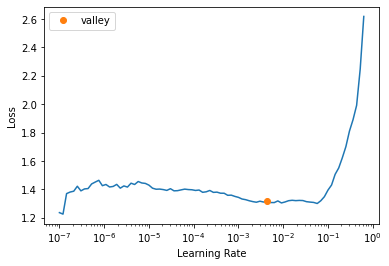

In [31]:
learn.lr_find()

In [47]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, lr=3e-3)
learn.fine_tune(6, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy,time
0,1.249140,0.844414,0.584646,00:03
1,1.179992,0.781003,0.600394,00:03
2,1.110447,0.825607,0.600394,00:03
3,1.029046,0.749364,0.586614,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.789844,0.677518,0.631890,00:04
1,0.752977,0.734388,0.602362,00:04
2,0.701320,0.707889,0.608268,00:04
3,0.662778,0.664364,0.625984,00:04
4,0.613844,0.660550,0.635827,00:04
5,0.581250,0.661017,0.637795,00:04


In [34]:
interp = ClassificationInterpretation.from_learner(learn)

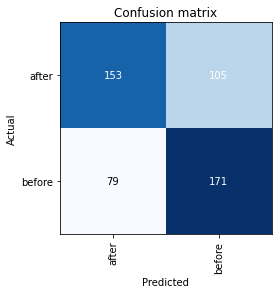

In [38]:
interp.plot_confusion_matrix()

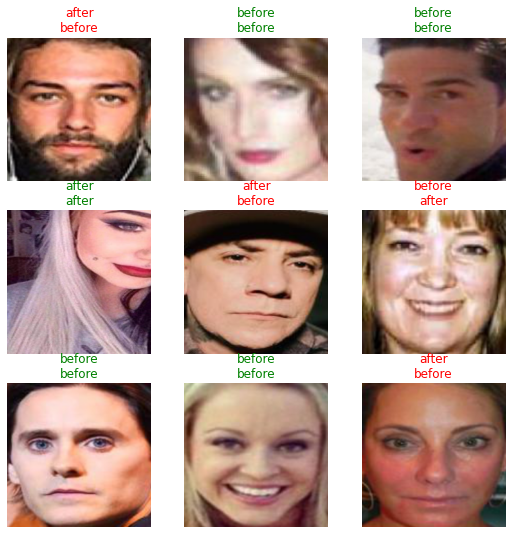

In [36]:
learn.show_results()